In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# dataset of about 3,700 photos of flowers. The dataset contains five sub-directories, one per class:

flower_photo/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

# After downloading, you should now have a copy of the dataset available. There are 3,670 total images:

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

49


In [4]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/12243069253_e512464095_n.jpg'),
 WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/12572786553_634868f7f2_n.jpg'),
 WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg'),
 WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/14154164774_3b39d36778.jpg')]

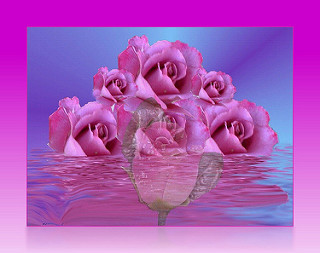

In [5]:
roses = list(data_dir.glob('roses/*'))

PIL.Image.open(str(roses[1]))

In [6]:
flowers_images_dict = {
"roses":list(data_dir.glob('roses/*')),
"daisy":list(data_dir.glob('daisy/*')),
    "dandelion":list(data_dir.glob('dandelion/*')),
    "sunflowers":list(data_dir.glob('sunflowers/*')),
    "tulips":list(data_dir.glob('tulips/*'))
}

In [7]:
flowers_images_dict["roses"]

[WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/12243069253_e512464095_n.jpg'),
 WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/12572786553_634868f7f2_n.jpg'),
 WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg'),
 WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/14154164774_3b39d36778.jpg'),
 WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/14414100710_753a36fce9.jpg'),
 WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/14747962886_2bff6bb323_m.jpg'),
 WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 WindowsPath('C:/Users/karti/.keras/dat

# Label dict

In [8]:
flowers_labels_dict = {
    "roses":0,
    "daily":1,
    "dandelion":2,
    "sunflowers":3,
    "tulips":4
}

This is window path

In [9]:
flowers_images_dict["roses"][0]

WindowsPath('C:/Users/karti/.keras/datasets/flower_photos/roses/12243069253_e512464095_n.jpg')

convert into str

In [10]:
str(flowers_images_dict["roses"][0])


'C:\\Users\\karti\\.keras\\datasets\\flower_photos\\roses\\12243069253_e512464095_n.jpg'

Now i will use cv2 function imread.
This will read the images from disk and converted into 3D array

In [11]:
img = cv2.imread(str(flowers_images_dict["roses"][0]))
img.shape

(254, 320, 3)

# Now we resize our image size because they are of different size

In [12]:
cv2.resize(img,(100,100)).shape

(100, 100, 3)

# let make x and y

In [13]:
x , y = [],[]
for flower_names ,image in flowers_images_dict.items():
    print(flower_names)
    print(len(image))

roses
49
daisy
0
dandelion
0
sunflowers
0
tulips
0


In [15]:
x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [16]:
x = np.array(x)
y = np.array(y)

# Train test split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [19]:
len(X_train)

36

# Preprocessing: scale images

In [20]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255


# Build convolutional neural network and train it

In [26]:
model = Sequential([
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(5)
])

In [28]:
model.compile(optimizer = "adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

In [30]:
model.fit(X_train_scaled, y_train, epochs=2) 

Epoch 1/2
2/2 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/2
2/2 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [33]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 172ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [35]:
prediction = model.predict(X_test_scaled)
prediction

array([[ 77.51791 , -11.697963, -16.178745, -17.305159,  -8.89501 ],
       [146.777   , -22.39254 , -30.738033, -32.700676, -16.868479],
       [117.66952 , -18.057915, -24.442778, -26.223658, -13.107424],
       [ 89.28508 , -13.855678, -18.738482, -19.85767 , -10.172365],
       [164.00745 , -25.050962, -34.36295 , -36.5917  , -18.500626],
       [134.45464 , -20.391438, -27.895716, -30.191515, -15.36265 ],
       [189.23856 , -28.8131  , -39.43412 , -42.36127 , -21.41826 ],
       [ 91.65966 , -14.013372, -19.280104, -20.592417, -10.501156],
       [113.83839 , -17.56572 , -23.600328, -25.397184, -13.036234],
       [156.72374 , -23.730795, -32.998627, -35.185173, -17.671225],
       [174.53716 , -26.754723, -36.22044 , -39.01484 , -19.809317],
       [132.61157 , -20.189224, -27.740536, -29.749504, -15.271169],
       [129.6425  , -19.690763, -26.997944, -29.099043, -14.746908]],
      dtype=float32)

In [37]:
score = tf.nn.softmax(prediction[0])

In [38]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       2.9603736e-38], dtype=float32)>

In [40]:
np.argmax(score)

0